In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("India_new_car_sales_by_make.csv")
print (data)

      Year  Month          Make  Quantity   Pct
0     2015      1        Toyota      2884  22.7
1     2015      1    Volkswagen      2521  19.9
2     2015      1      Mahindra      1029   8.1
3     2015      1          Ford       870   6.9
4     2015      1         Volvo       693   5.5
...    ...    ...           ...       ...   ...
4372  2025      1  Force Motors         3   0.0
4373  2025      1      Maserati         2   0.0
4374  2025      1       Ferrari         1   0.0
4375  2025      1         Smart         1   0.0
4376  2025      1     Ssangyong         1   0.0

[4377 rows x 5 columns]


In [3]:
print (data.isnull().sum())

Year         0
Month        0
Make        10
Quantity     0
Pct          0
dtype: int64


In [4]:
data = pd.read_csv('India_new_car_sales_by_make.csv')
x = data ["Make"].mode()[0]
data["Make"].fillna(x, inplace = True)

C:\Users\mas12\AppData\Local\Temp\ipykernel_20204\3331720033.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Make"].fillna(x, inplace = True)


In [5]:
data.isnull().sum()

Year        0
Month       0
Make        0
Quantity    0
Pct         0
dtype: int64

In [6]:
data.describe()

,Year,Month,Quantity,Pct
count,4377.000000,4377.000000,4377.000000,4377.000000
mean,2019.421065,6.459904,307.802376,2.762257
std,2.906408,3.446815,411.315972,3.635185
min,2015.000000,1.000000,1.000000,0.000000
25%,2017.000000,3.000000,14.000000,0.100000
50%,2019.000000,6.000000,153.000000,1.400000
75%,2022.000000,9.000000,461.000000,4.200000
max,2025.000000,12.000000,3017.000000,22.700000


In [7]:
from sklearn.preprocessing import OneHotEncoder as OHE

In [8]:
ohe_make= OHE()
ohe_makes =ohe_make.fit_transform(data[['Make']]).toarray()

ohe_columns = pd.DataFrame(ohe_makes, columns = ohe_make.get_feature_names_out(['Make']))
ohe_makers = pd.concat([data,ohe_columns], axis=1).drop('Make',axis=1)

ohe_makers

,Year,Month,Quantity,Pct,Make_Ashok LeyLand,Make_Aston Martin,Make_Audi,Make_BMW,Make_BYD,Make_Bentley,...,Make_Smart,Make_Ssangyong,Make_Suzuki,Make_Tata,Make_Tazzari,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo,Make_Westfield
0,2015,1,2884,22.7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2015,1,2521,19.9,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2015,1,1029,8.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,1,870,6.9,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,693,5.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4372,2025,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4373,2025,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4374,2025,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4375,2025,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X = ohe_makers.drop(columns=['Quantity','Pct'])

y = ohe_makers['Quantity']

X

,Year,Month,Make_Ashok LeyLand,Make_Aston Martin,Make_Audi,Make_BMW,Make_BYD,Make_Bentley,Make_BharatBenz,Make_Binz,...,Make_Smart,Make_Ssangyong,Make_Suzuki,Make_Tata,Make_Tazzari,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo,Make_Westfield
0,2015,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2015,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2015,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4372,2025,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4373,2025,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4374,2025,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4375,2025,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,Year,Month,Make_Ashok LeyLand,Make_Aston Martin,Make_Audi,Make_BMW,Make_BYD,Make_Bentley,Make_BharatBenz,Make_Binz,...,Make_Smart,Make_Ssangyong,Make_Suzuki,Make_Tata,Make_Tazzari,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo,Make_Westfield
0,-1.521318,-1.584224,-0.168613,-0.078784,-0.168613,-0.168613,-0.126557,-0.054579,-0.165725,-0.021381,...,-0.160559,-0.136446,-0.168613,-0.169329,-0.021381,-0.133817,5.930730,-0.168613,-0.168613,-0.015117
1,-1.521318,-1.584224,-0.168613,-0.078784,-0.168613,-0.168613,-0.126557,-0.054579,-0.165725,-0.021381,...,-0.160559,-0.136446,-0.168613,-0.169329,-0.021381,-0.133817,-0.168613,5.930730,-0.168613,-0.015117
2,-1.521318,-1.584224,-0.168613,-0.078784,-0.168613,-0.168613,-0.126557,-0.054579,-0.165725,-0.021381,...,-0.160559,-0.136446,-0.168613,-0.169329,-0.021381,-0.133817,-0.168613,-0.168613,-0.168613,-0.015117
3,-1.521318,-1.584224,-0.168613,-0.078784,-0.168613,-0.168613,-0.126557,-0.054579,-0.165725,-0.021381,...,-0.160559,-0.136446,-0.168613,-0.169329,-0.021381,-0.133817,-0.168613,-0.168613,-0.168613,-0.015117
4,-1.521318,-1.584224,-0.168613,-0.078784,-0.168613,-0.168613,-0.126557,-0.054579,-0.165725,-0.021381,...,-0.160559,-0.136446,-0.168613,-0.169329,-0.021381,-0.133817,-0.168613,-0.168613,5.930730,-0.015117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4372,1.919749,-1.584224,-0.168613,-0.078784,-0.168613,-0.168613,-0.126557,-0.054579,-0.165725,-0.021381,...,-0.160559,-0.136446,-0.168613,-0.169329,-0.021381,-0.133817,-0.168613,-0.168613,-0.168613,-0.015117
4373,1.919749,-1.584224,-0.168613,-0.078784,-0.168613,-0.168613,-0.126557,-0.054579,-0.165725,-0.021381,...,-0.160559,-0.136446,-0.168613,-0.169329,-0.021381,-0.133817,-0.168613,-0.168613,-0.168613,-0.015117
4374,1.919749,-1.584224,-0.168613,-0.078784,-0.168613,-0.168613,-0.126557,-0.054579,-0.165725,-0.021381,...,-0.160559,-0.136446,-0.168613,-0.169329,-0.021381,-0.133817,-0.168613,-0.168613,-0.168613,-0.015117
4375,1.919749,-1.584224,-0.168613,-0.078784,-0.168613,-0.168613,-0.126557,-0.054579,-0.165725,-0.021381,...,6.228235,-0.136446,-0.168613,-0.169329,-0.021381,-0.133817,-0.168613,-0.168613,-0.168613,-0.015117


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.25, random_state = 40)

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)
y_pred

array([   2.02490234,   65.02490234,  607.68115234, ..., 1764.61865234,
         12.39990234,   -3.10009766])

In [16]:
new_sample = pd.DataFrame({
    'Year':[2030],
    'Month':[3],
    'Make': ['Toyota']
})

In [17]:
encoded_new_data = ohe_make.transform(new_sample[['Make']]).toarray()
encoded_new_data_df = pd.DataFrame(encoded_new_data, columns = ohe_make.get_feature_names_out (['Make']))

new_data_encoded = pd.concat([new_sample.drop('Make', axis=1), encoded_new_data_df], axis=1)

In [18]:
new_data_scaled = scaler.transform(new_data_encoded)
new_data_scaled

array([[ 3.64028186, -1.00391214, -0.16861332, -0.07878386, -0.16861332,
        -0.16861332, -0.12655715, -0.05457947, -0.16572504, -0.0213809 ,
        -0.07878386, -0.14814599, -0.05243225, -0.09960698, -0.16861332,
        -0.05664628, -0.11384183, -0.10529963, -0.11588371, -0.06943297,
        -0.16861332, -0.03381777, -0.1117646 , -0.16861332, -0.16861332,
        -0.16861332, -0.01511685, -0.09724052, -0.1117646 , -0.16572504,
        -0.15980893, -0.16861332, -0.01511685, -0.0213809 , -0.05664628,
        -0.16861332, -0.1763389 , -0.02618914, -0.16861332, -0.16861332,
        -0.16861332, -0.01511685, -0.07730225, -0.01511685, -0.16861332,
        -0.03381777, -0.16861332, -0.08445707, -0.16861332, -0.01511685,
        -0.16572504, -0.16861332, -0.03704974, -0.01511685, -0.16861332,
        -0.16055914, -0.13644647, -0.16861332, -0.16932853, -0.0213809 ,
        -0.13381695,  5.93072961, -0.16861332, -0.16861332, -0.01511685]])

In [19]:
predicted_quantity = model.predict(new_data_scaled)
print(f"Predicted Quantity: {predicted_quantity[0]: .2f}")

Predicted Quantity:  1510.47


C:\Users\mas12\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
predicted_quantity = model.predict(new_data_scaled)

total_sales_quantity = ohe_makers[ohe_makers['Month'] == 8]['Quantity'].sum()

predicted_pct = (predicted_quantity[0] / total_sales_quantity) * 100

print(f"Predicted sales percentage for the given future sample: {predicted_pct:.2f}%")

Predicted sales percentage for the given future sample: 1.38%


C:\Users\mas12\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
# new_samples = pd.DataFrame({
#     'Year': [2027] * 12,
#     'Month': list(range(1, 13)),
#     'Make': ['Toyota'] * 12
# })

# sales_predictions = model.predict(new_samples)

# new_samples['Predicted_Sales'] = sales_predictions

# total_sales_2027 = new_samples['Predicted_Sales'].sum()

# print(new_samples)
# print(f"Total Sales for 2027: {total_sales_2027}")

In [22]:
import matplotlib.pyplot as plt

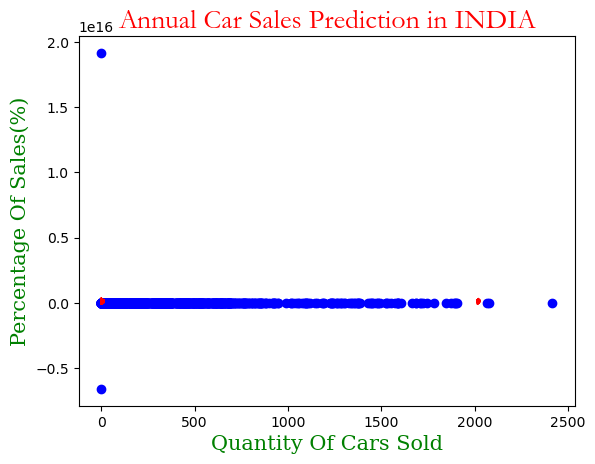

In [23]:
plt.scatter(y_test, y_pred, color="blue", label="Actual Data")
plt.plot(X, model.predict(X), color='red', label='Regression Line')
font1 = {'family': 'Garamond', 'color': 'red', 'size': 20}
font2 = {'family': 'serif', 'color': 'green', 'size': 15}
plt.xlabel('Quantity Of Cars Sold', fontdict=font2)
plt.ylabel('Percentage Of Sales(%)', fontdict=font2)
plt.title('Annual Car Sales Prediction in INDIA', fontdict=font1)
# plt.legend()
plt.show()

In [24]:
import seaborn as sns

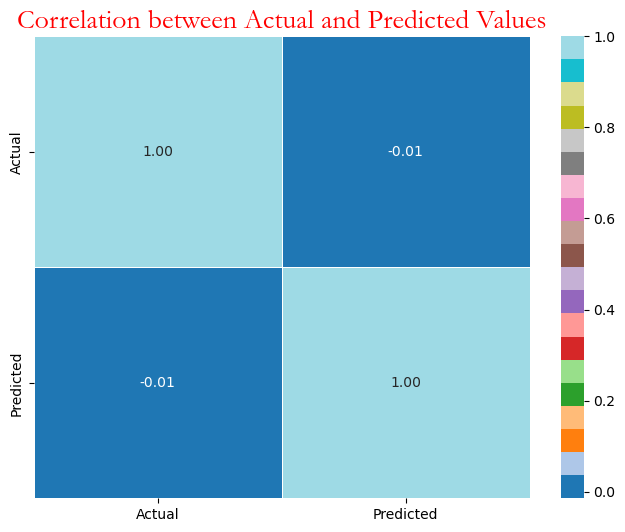

In [54]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="tab20", fmt='.2f', linewidths = 0.5)
font1 = {'family': 'Garamond', 'color': 'red', 'size': 20}
font2 = {'family': 'serif', 'color': 'green', 'size': 15}
plt.title('Correlation between Actual and Predicted Values', fontdict=font1)
plt.show()

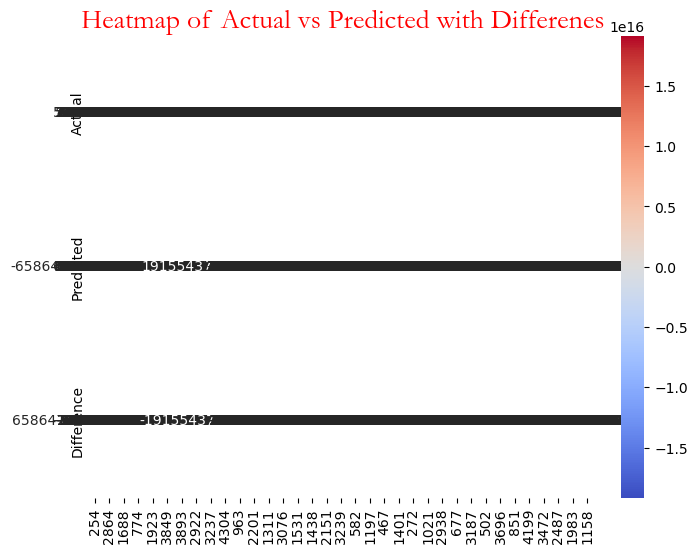

In [26]:
df['Difference'] = df['Actual'] - df['Predicted']
plt.figure(figsize=(8,6))
sns.heatmap(df[['Actual', 'Predicted', 'Difference']].T,annot= True, cmap='coolwarm',fmt='2f', linewidths=0.5)
plt.title("Heatmap of Actual vs Predicted with Differenes", fontdict=font1)
plt.show()